In [1]:
import os
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [2]:
TRAIN_DIR = "images/train/"
TEST_DIR = "images/test/"

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
fear completed
happy completed
neutral completed
sad completed


In [5]:
print(train)

                              image  label
0          images/train/angry\0.jpg  angry
1          images/train/angry\1.jpg  angry
2         images/train/angry\10.jpg  angry
3      images/train/angry\10002.jpg  angry
4      images/train/angry\10016.jpg  angry
...                             ...    ...
25175     images/train/sad\9966.jpg    sad
25176     images/train/sad\9974.jpg    sad
25177     images/train/sad\9976.jpg    sad
25178     images/train/sad\9986.jpg    sad
25179     images/train/sad\9997.jpg    sad

[25180 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
fear completed
happy completed
neutral completed
sad completed


In [7]:
print(test)
print(test['image'])

                            image  label
0     images/test/angry\10052.jpg  angry
1     images/test/angry\10065.jpg  angry
2     images/test/angry\10079.jpg  angry
3     images/test/angry\10095.jpg  angry
4     images/test/angry\10121.jpg  angry
...                           ...    ...
6153     images/test/sad\9864.jpg    sad
6154      images/test/sad\987.jpg    sad
6155     images/test/sad\9885.jpg    sad
6156     images/test/sad\9889.jpg    sad
6157     images/test/sad\9923.jpg    sad

[6158 rows x 2 columns]
0       images/test/angry\10052.jpg
1       images/test/angry\10065.jpg
2       images/test/angry\10079.jpg
3       images/test/angry\10095.jpg
4       images/test/angry\10121.jpg
                   ...             
6153       images/test/sad\9864.jpg
6154        images/test/sad\987.jpg
6155       images/test/sad\9885.jpg
6156       images/test/sad\9889.jpg
6157       images/test/sad\9923.jpg
Name: image, Length: 6158, dtype: object


In [8]:
from tqdm.notebook import tqdm

In [11]:
from tqdm import tqdm  # Standard tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):  # Basic tqdm without notebook integration
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features


In [12]:
train_features = extract_features(train['image']) 
test_features = extract_features(test['image'])
 

100%|██████████| 6158/6158 [00:01<00:00, 4013.83it/s]


In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 5)
y_test = to_categorical(y_test,num_classes = 5)

In [18]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
BatchNormalization()
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(5, activation='softmax'))

c:\Users\JANAVI SINGH\Desktop\Data analysis Projects\ExpressiFy\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [19]:
from tensorflow.keras.optimizers import AdamW

model.compile(optimizer=AdamW(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)


In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define Data Augmentation
#datagen = ImageDataGenerator(
 #   rotation_range=20,      # Rotate images up to 20 degrees
  #  width_shift_range=0.2,  # Shift width by 20% of the image width
   # height_shift_range=0.2, # Shift height by 20% of the image height
    #zoom_range=0.2,         # Zoom into images by 20%
    #horizontal_flip=True,   # Flip images horizontally
    #fill_mode='nearest'     # Fill pixels after transformation
#)
# Fit the generator to the training data
#datagen.fit(x_train)

In [38]:
# Train the model using the augmented data
#model.fit((x = x_train,y = y_train, batch_size=200), 
          #validation_data=(x_test, y_test),
          #epochs=50,
          #callbacks=[early_stopping, lr_scheduler]) 

In [24]:
model.fit(x= x_train,y = y_train, batch_size = 300, epochs = 30, validation_data = (x_test,y_test),callbacks=[early_stopping, lr_scheduler]) 

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.2547 - loss: 1.6309 - val_accuracy: 0.2964 - val_loss: 1.5848 - learning_rate: 0.0010
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.2812 - loss: 1.5879 - val_accuracy: 0.3055 - val_loss: 1.5782 - learning_rate: 0.0010
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.2984 - loss: 1.5655 - val_accuracy: 0.3620 - val_loss: 1.4833 - learning_rate: 0.0010
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.3575 - loss: 1.4920 - val_accuracy: 0.4359 - val_loss: 1.3847 - learning_rate: 0.0010
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.4103 - loss: 1.4094 - val_accuracy: 0.4480 - val_loss: 1.3309 - learning_rate: 0.0010
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.4286 - loss: 1.3655 - val_accuracy: 0.4969 - val_loss: 1.2531 - learning_rate: 0.0010
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.4517 - loss: 1.3114 - val_acc

In [25]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

193/193 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.5292 - loss: 1.1422
Test Loss: 0.9950478076934814
Test Accuracy: 0.6094511151313782


In [26]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [27]:
from keras.models import model_from_json

In [28]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [31]:
label = ['angry','fear','happy','neutral','sad']

In [32]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad


c:\Users\JANAVI SINGH\Desktop\Data analysis Projects\ExpressiFy\myenv\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
model prediction is  sad


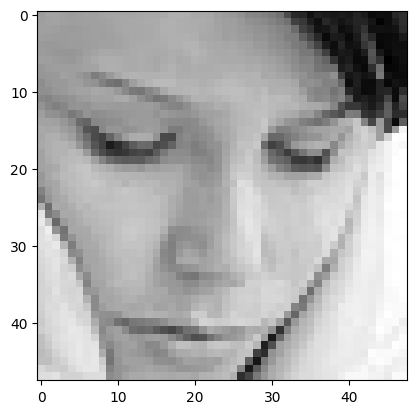

In [34]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
model prediction is  sad


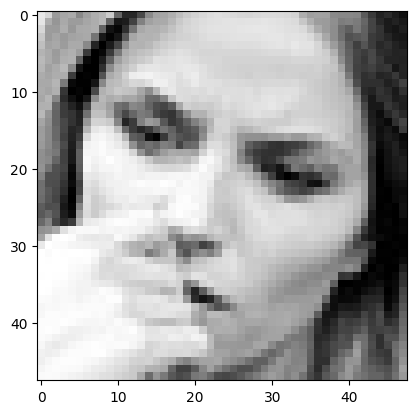

In [37]:
image = 'images/train/fear/2.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
model prediction is  happy


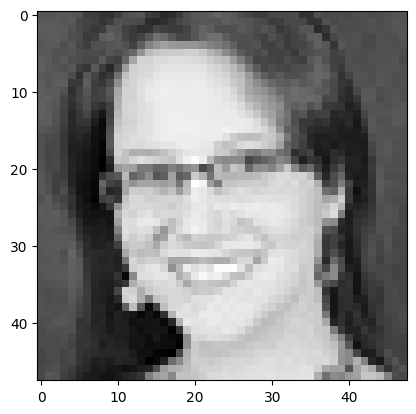

In [36]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')